## Import libraries and customize matplotlib styles params

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from   matplotlib import cm

# https://matplotlib.org/stable/tutorials/introductory/customizing.html

%matplotlib widget

# set defaults
plt.rcParams.update(plt.rcParamsDefault)

SMALL_SIZE  = 11
MEDIUM_SIZE = 14
BIGGER_SIZE = 12

# fonts
plt.rc('font',  size=SMALL_SIZE)
# title
plt.rc('axes',titlesize=BIGGER_SIZE)
plt.rc('axes',titleweight='bold')
# xy-labells
plt.rc('axes',labelsize=SMALL_SIZE)
# xy-ticks
plt.rc('xtick',labelsize=SMALL_SIZE)
plt.rc('ytick',labelsize=SMALL_SIZE)
# legend
plt.rc('legend',fontsize =SMALL_SIZE)
plt.rc('legend',framealpha=1)
plt.rc('legend',loc='upper left')
# lines
plt.rc('lines',linewidth=1)
# grid
plt.rc('axes' ,grid=True)

# pixel in inches
px2inch = 1/plt.rcParams['figure.dpi']

def plot_sets(ax,ti='',xla='',yla='',ba=1,xli=False,yli=False,leg=False):

    ax.set_title(ti)
    ax.set_xlabel(xla)
    ax.set_ylabel(yla)
    ax.set_box_aspect(ba)

    if xli: ax.set_xlim(xli)
    if yli: ax.set_ylim(yli)
    if leg: ax.legend()

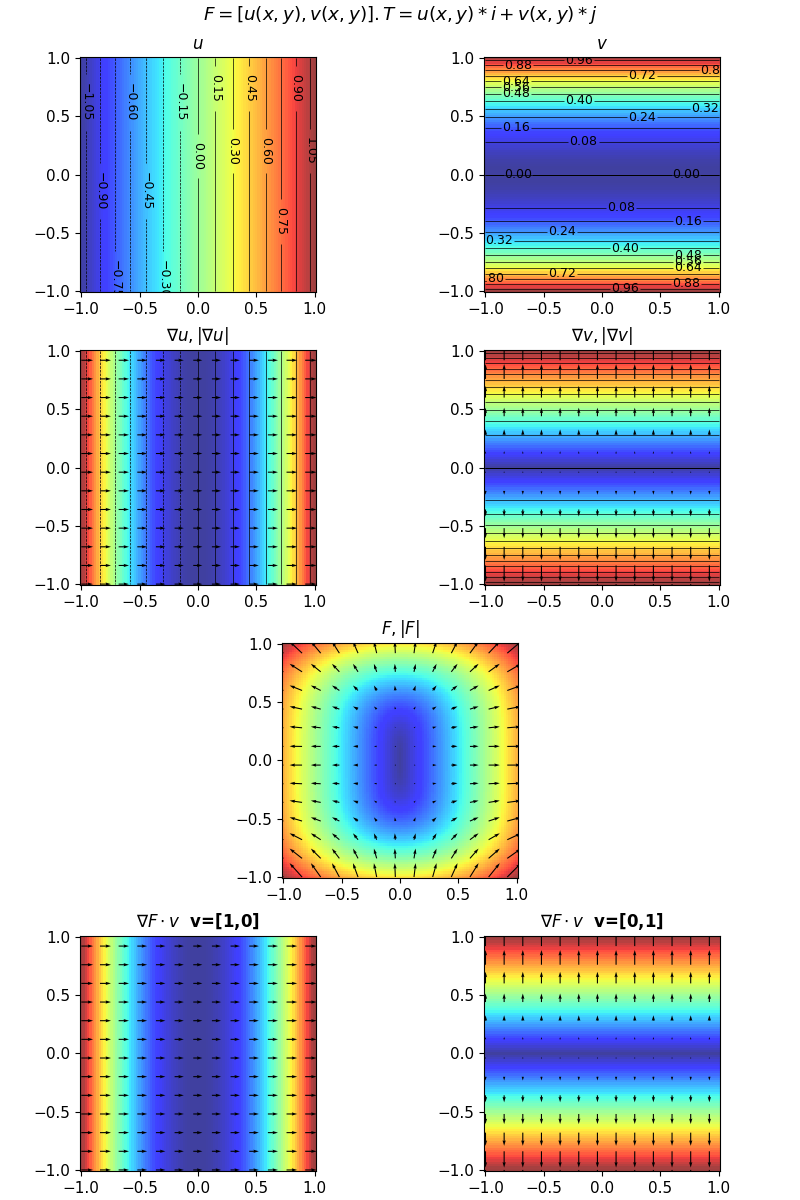

In [2]:

# coordinates of the spatial matrices
ab = 1
n  = 101
x  = np.linspace(-ab,ab,n)
y  = np.linspace(-ab,ab,n)
X,Y = np.meshgrid(x,y)

# vector field F = [U,
#                   V]

U = X**2
V = np.exp(Y)-1

U  = np.sin(X*Y)
V  = np.cos(X-Y)

U  = np.sin(X*Y)
V  = 0.1*X**3+X

U  = 0.1*X**3+X
V  = Y**2

MF = np.sqrt(U**2+V**2)

# gradient of F
d_xy    = np.diff(x)[0]
U_y,U_x = np.gradient(U,d_xy)
V_y,V_x = np.gradient(V,d_xy)
Gu      = np.sqrt(U_x**2 + U_y**2)
Gv      = np.sqrt(V_x**2 + V_y**2)

vx = np.array([[1],[0]])
vy = np.array([[0],[1]])

def directional_derivative(v):
    #Directional derivative matrices
    Dd_x = np.zeros_like(U)
    Dd_y = np.zeros_like(V)

    for i in range(n):
        for j in range(n):
            # Jacobian matrix
            J = np.array([ [U_x[i,j],U_y[i,j]],
                           [V_x[i,j],V_y[i,j]], ]) 
            Dd        = J@v
            Dd_x[i,j] = Dd[0][0]
            Dd_y[i,j] = Dd[1][0]           
    MDd = np.sqrt(Dd_x**2+Dd_y**2)
    
    return  Dd_x, Dd_y, MDd

layout = [[0,0,1,1],
          [2,2,3,3],
          [4,4,4,4],
          [5,5,6,6]]

size    = 400
fig, ax = plt.subplot_mosaic(layout,constrained_layout=True,figsize=(2*size*px2inch,3*size*px2inch))

N_CONTOUR = 15
alpha     = 0.75
cmap      = cm.jet
skip      = 8
font      = 9
lw        = 0.5

fig.suptitle(r'$F = [u(x,y),v(x,y)].T = u(x,y)*i + v(x,y)*j$')

axi = ax[0]
axi.pcolormesh(X,Y,U,alpha=alpha,zorder=1,cmap=cmap)
cu  = axi.contour(X,Y,U,N_CONTOUR,colors='k',linewidths=lw ,zorder=3)
axi.clabel(cu, inline=True, fontsize=font)
axi.set_title('$u$')
axi.grid(False)
axi.set_aspect(1)

axi = ax[1]
axi.pcolormesh(X,Y,V,alpha=alpha,zorder=1,cmap=cmap)
cu  = axi.contour(X,Y,V,N_CONTOUR,colors='k',linewidths=lw ,zorder=3)
axi.clabel(cu, inline=True, fontsize=font)
axi.set_title('$v$')
axi.grid(False)
axi.set_aspect(1)

axi = ax[2]
axi.pcolormesh(X,Y,Gu,alpha=alpha,zorder=1,cmap=cmap)
cu  = axi.contour(X,Y,U,N_CONTOUR,colors='k',linewidths=lw ,zorder=3)
axi.quiver(X[::skip,::skip],Y[::skip,::skip], U_x[::skip,::skip], U_y[::skip,::skip])
axi.set_title(r'$\nabla{u},|\nabla{u}|$')
axi.grid(False)
axi.set_aspect(1)

axi = ax[3]
axi.pcolormesh(X,Y,Gv,alpha=alpha,zorder=1,cmap=cmap)
cu  = axi.contour(X,Y,V,N_CONTOUR,colors='k',linewidths=lw ,zorder=3)
axi.quiver(X[::skip,::skip],Y[::skip,::skip], V_x[::skip,::skip], V_y[::skip,::skip])
axi.set_title(r'$\nabla{v},|\nabla{v}|$')
axi.grid(False)
axi.set_aspect(1)

axi = ax[4]
axi.pcolormesh(X,Y,MF,alpha=alpha,zorder=1,cmap=cmap)
axi.quiver(X[::skip,::skip],Y[::skip,::skip],U[::skip,::skip], V[::skip,::skip])
axi.set_title(r'$F,|F|$')
axi.grid(False)
axi.set_aspect(1)

Dd_x, Dd_y, MDd = directional_derivative(vx)
axi = ax[5]
axi.pcolormesh(X,Y,MDd,alpha=alpha,zorder=1,cmap=cmap)
axi.quiver(X[::skip,::skip],Y[::skip,::skip],Dd_x[::skip,::skip], Dd_y[::skip,::skip])
axi.set_title(r'$\nabla{F} \cdot v$' + f'  v=[{vx[0][0]},{vx[1][0]}]')
axi.grid(False)
axi.set_aspect(1)

Dd_x, Dd_y, MDd = directional_derivative(vy)
axi = ax[6]
axi.pcolormesh(X,Y,MDd,alpha=alpha,zorder=1,cmap=cmap)
axi.quiver(X[::skip,::skip],Y[::skip,::skip],Dd_x[::skip,::skip], Dd_y[::skip,::skip])
axi.set_title(r'$\nabla{F} \cdot v$' + f'  v=[{vy[0][0]},{vy[1][0]}]')
axi.grid(False)
axi.set_aspect(1)


#plt.savefig("imgs/jacobian5.pdf", dpi=300)
 
plt.show()







In [10]:
np.arccos(0.5)*180/np.pi

60.00000000000001

In [12]:
125*np.tan(np.arccos(0.5))/(2*np.pi*50)

0.6891611192772402